In [5]:
%matplotlib inline
import pyximport

import sys
import os
sys.path.insert(0,os.path.join(os.getcwd(),os.pardir))
from qutip import *
import numpy as np
pyximport.install(setup_args={"include_dirs":np.get_include()})
import matplotlib.pyplot as plt
import LH_tools as LHT
import dorit.XXZZham as XXZZham
from dorit.XXZZham import add_high_energies, rotate_to_00_base
import random
import adiabatic_sim as asim
from IPython.display import display

In [6]:
n = 5
terms = []
for i in range(1, n+1):
    for j in range(i + 1, n+1):
        a = random.uniform(-1, 1)
        terms.append(XXZZham.XXZZ_term(i, j, a))

H = XXZZham.XXZZham(terms)
H_com = H.get_commuting_term_ham()
H_high_energies = add_high_energies(rotate_to_00_base(H_com),30)

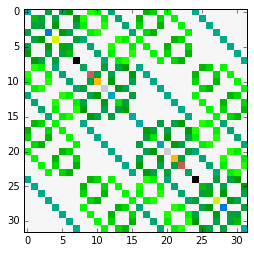

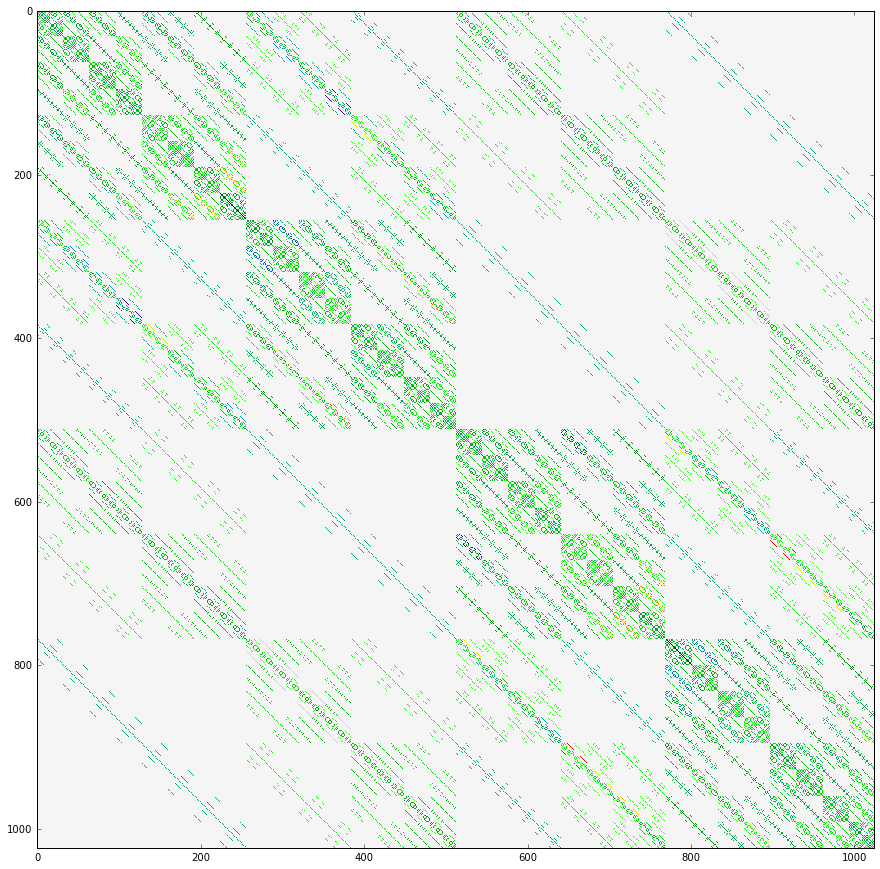

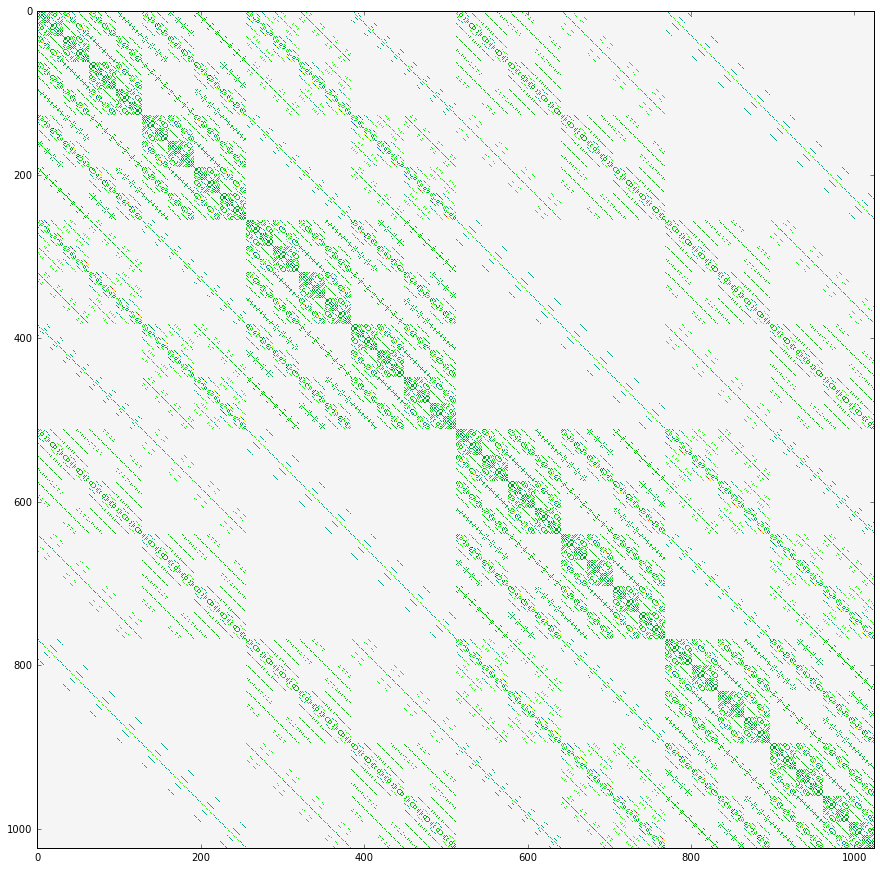

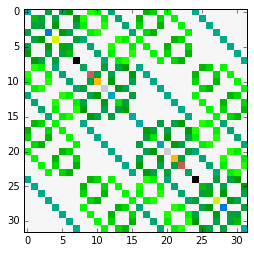

In [7]:
LHT.plot_operator(H.get_ham())
plt.figure(figsize=(15, 15))
com_ham = H.get_commuting_term_ham()
LHT.plot_operator(com_ham)
plt.figure(figsize=(15, 15))
LHT.plot_operator(rotate_to_00_base(com_ham))
plt.figure()
hamsize = H.get_ham().shape[0]
LHT.plot_operator(Qobj(rotate_to_00_base(com_ham)[0:hamsize,0:hamsize]))
pass

In [70]:
psi0 = H.get_ham().eigenstates(eigvals = 0 )[1][0]

In [71]:
psi0_extended = tensor(psi0,
                      tensor([basis(2,0)] * n))

In [72]:
h_com_rot = rotate_to_00_base(com_ham)

In [73]:
from collections import OrderedDict
from tqdm import tnrange
j_overlaps = OrderedDict()



for j in tnrange(250, desc='1st loop'):
    j = j* 20
    psij = add_high_energies(h_com_rot, j).eigenstates(eigvals=1)[1][0]
    j_overlaps[j] = abs(psij.overlap(psi0_extended))**2

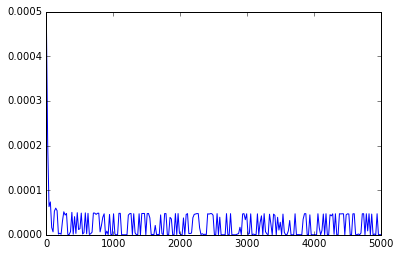

In [74]:
plt.plot(np.linspace(0,250*20,250), list(j_overlaps.values()))

In [75]:
psij = add_high_energies(h_com_rot, 1000000000000000).eigenstates(eigvals=1)[1][0]
abs(psij.overlap(psi0_extended))**2

7.8816307510787575e-06

In [85]:
add_high_energies(h_com_rot, 1000000000000000).eigenstates(eigvals=4)

(array([-5.01158309, -4.82886793, -4.46343759, -3.91529209]),
 array([ Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = [1024, 1], type = ket
 Qobj data =
 [[ 0.09004115]
  [-0.20465474]
  [ 0.29823207]
  ..., 
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]],
        Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = [1024, 1], type = ket
 Qobj data =
 [[ 0.1739673 ]
  [ 0.02912076]
  [-0.03687355]
  ..., 
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]],
        Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = [1024, 1], type = ket
 Qobj data =
 [[-0.00063555]
  [ 0.03397945]
  [-0.02534977]
  ..., 
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]],
        Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = [1024, 1], type = ket
 Qobj data =
 [[ 0.24285222]
  [ 0.24196757]
  [-0.53278299]
  ..., 
  [

In [87]:
H.get_ham().eigenstates(eigvals=4)

(array([-4.7594276 , -4.7594276 , -3.70205084, -3.70205084]),
 array([ Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = [32, 1], type = ket
 Qobj data =
 [[ 0.21650607]
  [-0.02886659]
  [ 0.044683  ]
  [-0.15096204]
  [-0.02996429]
  [ 0.14377048]
  [-0.06268258]
  [ 0.03116289]
  [-0.03221662]
  [ 0.17082719]
  [-0.04416597]
  [ 0.0217    ]
  [ 0.08318487]
  [-0.11972888]
  [ 0.02050149]
  [-0.07653411]
  [ 0.01210914]
  [-0.12957669]
  [ 0.75672913]
  [-0.01316142]
  [-0.1371517 ]
  [ 0.00698789]
  [-0.0270281 ]
  [ 0.20362053]
  [-0.19696056]
  [ 0.00991757]
  [-0.02274721]
  [ 0.18938499]
  [ 0.02388505]
  [-0.28241247]
  [ 0.18244713]
  [-0.03425536]],
        Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = [32, 1], type = ket
 Qobj data =
 [[-0.03425536]
  [-0.18244713]
  [ 0.28241247]
  [ 0.02388505]
  [-0.18938499]
  [-0.02274721]
  [ 0.00991757]
  [ 0.19696056]
  [-0.20362053]
  [-0.0270281 ]
  [ 0.00698789]
  [ 0.1371517 ]
  [-0.01316142]

In [63]:
expect(H.get_ham(),Qobj(psij[0:2**n],dims=psi0.dims))

-4.704145855022473

In [64]:
expect(H.get_ham(),psi0)

-4.759427596210001

In [65]:
H.get_ham().eigenstates()

(array([ -4.75942760e+00,  -4.75942760e+00,  -3.70205084e+00,
         -3.70205084e+00,  -3.51953764e+00,  -3.51953764e+00,
         -2.44087944e+00,  -2.44087944e+00,  -1.25885442e+00,
         -1.25885442e+00,  -4.40107367e-01,  -4.40107367e-01,
         -5.00859551e-15,  -4.39580331e-15,   3.42709639e-02,
          3.42709639e-02,   1.09319551e-01,   1.09319551e-01,
          6.02136157e-01,   6.02136157e-01,   1.47858421e+00,
          1.47858421e+00,   1.56548200e+00,   1.56548200e+00,
          1.80705440e+00,   1.80705440e+00,   2.62742992e+00,
          2.62742992e+00,   3.10359050e+00,   3.10359050e+00,
          4.79298959e+00,   4.79298959e+00]),
 array([ Quantum object: dims = [[2, 2, 2, 2, 2], [1, 1, 1, 1, 1]], shape = [32, 1], type = ket
 Qobj data =
 [[-0.03127736]
  [-0.18282653]
  [ 0.28299975]
  [ 0.0218086 ]
  [-0.18977882]
  [-0.02076968]
  [ 0.00905538]
  [ 0.19737014]
  [-0.20404396]
  [-0.0246784 ]
  [ 0.0063804 ]
  [ 0.1374369 ]
  [-0.01201723]
  [-0.75830275]
 

It seems like even with very high J , $|\psi^J_0>$ does not go $|\psi_0>\otimes |0^n>$
so I'll try a simpler hamiltonian

In [108]:
n = 2
terms = []
for i in range(1, n+1):
    for j in range(i + 1, n+1):
        a = random.uniform(-1, 1)
        terms.append(XXZZham.XXZZ_term(i, j, a))

H_simple = XXZZham.XXZZham(terms)
H_simple_com = H_simple.get_commuting_term_ham()
H_simple_high_energies = add_high_energies(rotate_to_00_base(H_simple_com),100000)

In [109]:
H_simple.get_ham()

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.39213397  0.          0.          0.39213397]
 [ 0.         -0.39213397  0.39213397  0.        ]
 [ 0.          0.39213397 -0.39213397  0.        ]
 [ 0.39213397  0.          0.          0.39213397]]

In [110]:
H_simple_high_energies

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = [16, 16], type = oper, isherm = True
Qobj data =
[[  3.92133974e-01   0.00000000e+00   0.00000000e+00   3.92133974e-01
    0.00000000e+00   3.92133974e-01   3.92133974e-01   0.00000000e+00
    0.00000000e+00   3.92133974e-01   3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00   3.92133974e-01]
 [  0.00000000e+00  -3.92133974e-01   3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    0.00000000e+00  -3.92133974e-01   3.92133974e-01   0.00000000e+00]
 [  0.00000000e+00   3.92133974e-01  -3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    0.00000000e+00   3.92133974e-01  -3.92133974e-01   0.00000000e+00]
 [  3.92133974e-01   0.00000000e+00   0.0000000

In [124]:
display(H_simple.get_ham().eigenstates())
psi0_simple = H_simple.get_ham().eigenstates(eigvals=1)[1][0]


(array([ -7.84267949e-01,   0.00000000e+00,   4.44089210e-16,
          7.84267949e-01]),
 array([ Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
 Qobj data =
 [[ 0.        ]
  [-0.70710678]
  [ 0.70710678]
  [ 0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
 Qobj data =
 [[ 0.        ]
  [-0.70710678]
  [-0.70710678]
  [ 0.        ]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
 Qobj data =
 [[ 0.70710678]
  [ 0.        ]
  [ 0.        ]
  [-0.70710678]],
        Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
 Qobj data =
 [[-0.70710678]
  [ 0.        ]
  [ 0.        ]
  [-0.70710678]]], dtype=object))

In [117]:
# this is the only tensor 0^n state
H_simple_com.eigenstates()[1][9]

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

In [115]:
expect(H_simple_com,H_simple_com.eigenstates()[1][9])

4.930380657631324e-31

In [121]:
phi = Qobj(H_simple_com.eigenstates()[1][9][0:4],dims=psi0_simple.dims)

In [125]:
phi

Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.70710678]]

In [128]:
H_simple.get_ham()*phi

Quantum object: dims = [[2, 2], [1, 1]], shape = [4, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]

okay that's wierd .... the only one that was kept is the zero vector

In [129]:
H_simple_high_energies = add_high_energies(rotate_to_00_base(H_simple_com),100000000000000000)

In [130]:
H_simple_high_energies

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = [16, 16], type = oper, isherm = True
Qobj data =
[[  3.92133974e-01   0.00000000e+00   0.00000000e+00   3.92133974e-01
    0.00000000e+00   3.92133974e-01   3.92133974e-01   0.00000000e+00
    0.00000000e+00   3.92133974e-01   3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00   3.92133974e-01]
 [  0.00000000e+00  -3.92133974e-01   3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    0.00000000e+00  -3.92133974e-01   3.92133974e-01   0.00000000e+00]
 [  0.00000000e+00   3.92133974e-01  -3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    0.00000000e+00   3.92133974e-01  -3.92133974e-01   0.00000000e+00]
 [  3.92133974e-01   0.00000000e+00   0.0000000

In [134]:
H_simple_high_energies.eigenstates()

(array([ -4.54915542e+00,   3.92133974e-01,   2.81739467e+01,
          8.00000000e+01,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17]),
 array([ Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
 Qobj data =
 [[ 0.        ]
  [ 0.99335521]
  [ 0.11508882]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]],
        Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
 Qobj data =
 [[ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]],
        Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = 

In [139]:
phi = Qobj(H_simple_high_energies.eigenstates()[1][0][0:4],dims=psi0_simple.dims)

In [144]:
expect(H_simple.get_ham(),phi)

-0.30247326355645165

Which is not an eigvector of the small matrix ... maybe use scipy linalg ?

In [151]:
from scipy.linalg import eig
eigvals,eigvecs = eig(H_simple_high_energies.data.toarray())
# which is noisy
for i in range(len(eigvecs)):
    eigvecs[i][abs(eigvecs[i]) < 0.0000001] = 0
display(eigvals,eigvecs)

array([  3.92133974e-01+0.j        ,   1.00000000e+17+0.j        ,
        -1.99050476e+00+0.86907639j,  -1.99050476e+00-0.86907639j,
         1.00000000e+17+0.j        ,   1.00000000e+17+0.j        ,
         0.00000000e+00+0.j        ,   1.00000000e+17+0.j        ,
         1.00000000e+17+0.j        ,   1.00000000e+17+0.j        ,
         1.00000000e+17+0.j        ,   1.00000000e+17+0.j        ,
         1.00000000e+17+0.j        ,   1.00000000e+17+0.j        ,
         1.00000000e+17+0.j        ,   1.00000000e+17+0.j        ])

array([[ 1.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.01033421 +2.40636429e-02j,  0.01033421 -2.40636429e-02j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.43438391 +9.10834376e-18j,  0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j],
       [ 0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.83322231 +0.00000000e+00j,  0.83322231 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.73852571 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.00000000 +0.00000000e+00j,
         0.00000000 +0.00000000e+00j,  0.000000

In [158]:
psi0_simple_extended = tensor(psi0_simple,
                             tensor([basis(2,0)] * n)
                              )

In [164]:
expect(H_simple_high_energies,psi0_simple_extended)

1e+17

In [165]:
expect(H_simple.get_ham(),psi0_simple)

-0.7842679489194073

In [166]:
H_simple_high_energies

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = [16, 16], type = oper, isherm = True
Qobj data =
[[  3.92133974e-01   0.00000000e+00   0.00000000e+00   3.92133974e-01
    0.00000000e+00   3.92133974e-01   3.92133974e-01   0.00000000e+00
    0.00000000e+00   3.92133974e-01   3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00   3.92133974e-01]
 [  0.00000000e+00  -3.92133974e-01   3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    0.00000000e+00  -3.92133974e-01   3.92133974e-01   0.00000000e+00]
 [  0.00000000e+00   3.92133974e-01  -3.92133974e-01   0.00000000e+00
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    3.92133974e-01   0.00000000e+00   0.00000000e+00  -3.92133974e-01
    0.00000000e+00   3.92133974e-01  -3.92133974e-01   0.00000000e+00]
 [  3.92133974e-01   0.00000000e+00   0.0000000

In [167]:
H_simple.get_ham()

Quantum object: dims = [[2, 2], [2, 2]], shape = [4, 4], type = oper, isherm = True
Qobj data =
[[ 0.39213397  0.          0.          0.39213397]
 [ 0.         -0.39213397  0.39213397  0.        ]
 [ 0.          0.39213397 -0.39213397  0.        ]
 [ 0.39213397  0.          0.          0.39213397]]

In [173]:
np.set_printoptions(threshold=16)
H_simple_high_energies * psi0_simple_extended

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
Qobj data =
[[  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [ -7.07106781e+16]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  7.07106781e+16]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]
 [  0.00000000e+00]]

In [201]:
psi0_simple_extended = Qobj(
    np.concatenate((psi0_simple.data.toarray(),np.zeros((12,1))),0),dims=(tensor([basis(2,0)] * 4)).dims
    )

In [204]:
expect(H_simple_high_energies,psi0_simple_extended)

-0.7842679489194073

In [206]:
phi =  H_simple_high_energies.eigenstates()[1][0]

In [215]:
phi_small = Qobj(phi[0:4],dims=psi0_simple.dims)
expect(H_simple.get_ham(),phi_small)

-0.30247326355645165

In [217]:
expect(H_simple_high_energies,phi)

-0.30247326355645165

In [218]:
H_simple_high_energies.eigenstates()

(array([ -4.54915542e+00,   3.92133974e-01,   2.81739467e+01,
          8.00000000e+01,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17,   1.00000000e+17,   1.00000000e+17,
          1.00000000e+17]),
 array([ Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
 Qobj data =
 [[ 0.        ]
  [ 0.99335521]
  [ 0.11508882]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]],
        Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
 Qobj data =
 [[ 1.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]
  [ 0.]],
        Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = 

In [219]:
H_simple_high_energies * phi

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
Qobj data =
[[ 0.        ]
 [-0.34439809]
 [ 0.34439809]
 [ 0.        ]
 [ 0.43465856]
 [ 0.        ]
 [ 0.        ]
 [-0.43465856]
 [ 0.43465856]
 [ 0.        ]
 [ 0.        ]
 [-0.43465856]
 [ 0.        ]
 [-0.34439809]
 [ 0.34439809]
 [ 0.        ]]

In [220]:
phi

Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
Qobj data =
[[ 0.        ]
 [ 0.99335521]
 [ 0.11508882]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]

In [223]:
eig(H_simple_high_energies.data.toarray())[1][2]

array([  0.00000000e+00 +0.00000000e+00j,
         1.51261410e-17 -1.31457720e-34j,
         5.25704263e-01 +1.73472348e-17j,
         5.25704263e-01 +0.00000000e+00j,
        -9.08402148e-17 +1.14827708e-33j,
        -1.23301094e-16 -9.26480096e-34j,
         2.77850692e-01 +2.72702116e-17j,
        -4.39226162e-17 -1.93149397e-33j,
        -1.41803711e-16 +2.35851398e-34j,
         9.31601559e-17 -6.05199748e-34j,
         1.38255980e-16 +2.47393407e-34j,
         1.92419886e-17 -2.49465606e-50j,
        -5.40558924e-17 +7.66712446e-34j,
        -9.26477388e-17 +9.32667586e-34j,
        -2.19543214e-17 -5.70514343e-34j,   7.59453186e-17 +7.65363623e-34j])

# It seems like eigenstates computes wrong eigenstates ! 
maybe it has something to do with very big values?

In [228]:
H_simple2 = XXZZham.XXZZham(terms)
H_simple_com2 = H_simple2.get_commuting_term_ham()
H_simple_high_energies2 = add_high_energies(rotate_to_00_base(H_simple_com2),1000)

In [229]:
H_simple_high_energies2.eigenstates()

(array([ -7.84883025e-01,  -1.23015243e-03,  -1.23015243e-03,
          7.83652873e-01,   9.98431464e+02,   9.98891493e+02,
          9.98891493e+02,   9.99216347e+02,   1.00000000e+03,
          1.00000000e+03,   1.00000000e+03,   1.00000000e+03,
          1.00078488e+03,   1.00110974e+03,   1.00110974e+03,
          1.00156854e+03]),
 array([ Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
 Qobj data =
 [[  0.00000000e+00]
  [ -7.07106564e-01]
  [  7.07106564e-01]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [  0.00000000e+00]
  [ -5.54560673e-04]
  [  5.54560673e-04]
  [  0.00000000e+00]],
        Quantum object: dims = [[2, 2, 2, 2], [1, 1, 1, 1]], shape = [16, 1], type = ket
 Qobj data =
 [[ -1.35439344e-03]
  [  7.07105049e-01]
  [  7.07105049e-01]
  [  1.35439344e-03]
  [ -5.54559827e-04]
  [  1.0622073

In [227]:
eig(H_simple_high_energies2.data.toarray())

(array([  7.78117565e-01+0.j,  -1.23015241e-02+0.j,  -1.23015241e-02+0.j,
         -7.90418333e-01+0.j,   1.00790418e+02+0.j,   1.01115222e+02+0.j,
          1.01568536e+02+0.j,   1.01115222e+02+0.j,   9.84314641e+01+0.j,
          9.88970795e+01+0.j,   9.88970795e+01+0.j,   9.92218824e+01+0.j,
          1.00000000e+02+0.j,   1.00000000e+02+0.j,   1.00000000e+02+0.j,
          1.00000000e+02+0.j]),
 array([[  7.07085039e-01+0.j,  -6.35109838e-01+0.j,   1.05781476e-01+0.j,
         ...,   1.59005568e-17+0.j,   3.72153211e-17+0.j,
          -4.35307147e-18+0.j],
        [ -3.34878819e-15-0.j,   3.10763553e-01+0.j,   6.99105694e-01+0.j,
         ...,   1.43955921e-16+0.j,  -5.47031867e-17-0.j,
           1.98083827e-16+0.j],
        [ -2.20130617e-15-0.j,   3.10763553e-01+0.j,   6.99105694e-01+0.j,
         ...,  -1.05865700e-16-0.j,  -1.25692988e-16-0.j,
          -1.01226546e-16+0.j],
        ..., 
        [ -5.02107325e-18-0.j,   3.82239513e-05+0.j,   8.59900776e-05+0.j,
         ..., 


![title](http://s2.quickmeme.com/img/70/70442e8bb546c8e4350b22ba88818a16339f4fae2f9ad6a17cde7a2ba5775806.jpg)
# so lets retry using smaller J's and extending $|\psi_0>$ properly

In [10]:
n = 5
terms = []
for i in range(1, n+1):
    for j in range(i + 1, n+1):
        a = random.uniform(-1, 1)
        terms.append(XXZZham.XXZZ_term(i, j, a))

H = XXZZham.XXZZham(terms)
H_ham = H.get_ham()
H_com = H.get_commuting_term_ham()
h_com_rot = rotate_to_00_base(H_com)

In [11]:
N = 2**n
psi0 = H.get_ham().eigenstates(eigvals = 0 )[1][0]
psi0_extended = Qobj(
    np.concatenate(
        (psi0.data.toarray(),
         np.zeros((N**2-N,1))),0),
        dims=(tensor([basis(2,0)] * 2*n).dims)
    )
expect(H_ham,psi0)

-2.8728231935981197

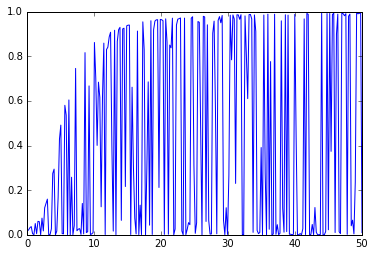

In [12]:
from collections import OrderedDict
from tqdm import tnrange
j_overlaps = OrderedDict()

for j in tnrange(250, desc='1st loop'):
    j = j / 5  
    psij = add_high_energies(h_com_rot, j).eigenstates(eigvals=1)[1][0]
    j_overlaps[j] = abs(psij.overlap(psi0_extended))**2
plt.plot(np.linspace(0,250/5,250), list(j_overlaps.values()))

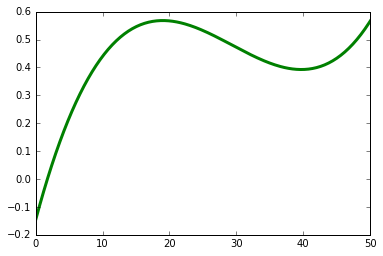

In [13]:
from scipy.interpolate import UnivariateSpline

x = np.linspace(0,250/5,250)
spl = UnivariateSpline(x, list(j_overlaps.values()))
spl.set_smoothing_factor(50)
plt.plot(x, spl(x), 'g', lw=3)

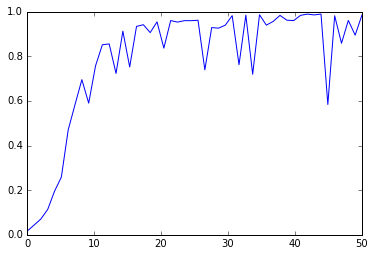

In [22]:
from collections import OrderedDict
from tqdm import tnrange
j_overlaps = OrderedDict()

for j in tnrange(0,250,5, desc='1st loop'):
    j = j / 5  
    _,eigvecs = add_high_energies(h_com_rot, j).eigenstates(eigvals=2)
    psij = eigvecs[0]
    psij2 = eigvecs[1]
    j_overlaps[j] = max(abs(psij.overlap(psi0_extended))**2,
                        abs(psij2.overlap(psi0_extended))**2)
plt.plot(np.linspace(0,250/5,50), list(j_overlaps.values()))

# Checking the consistancy of the behaviour 
I will check 10 different random hamiltonians to see the if the behavior of  $|<\psi_0^J|\psi_0, 0^n>|^2$ as a function of J is consistant


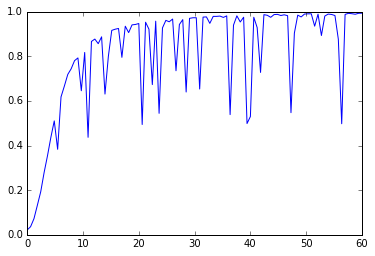

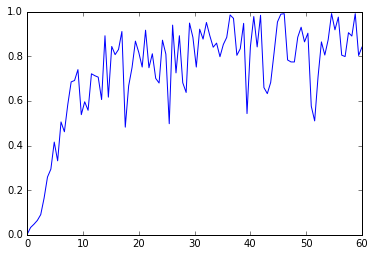

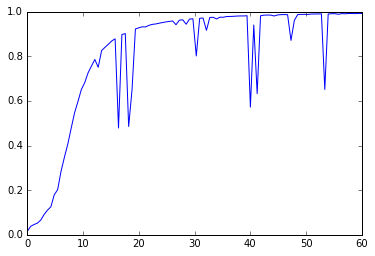

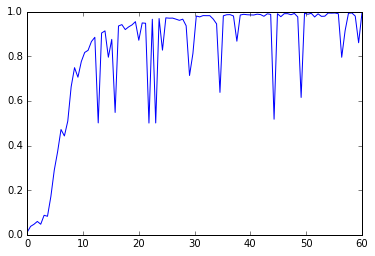

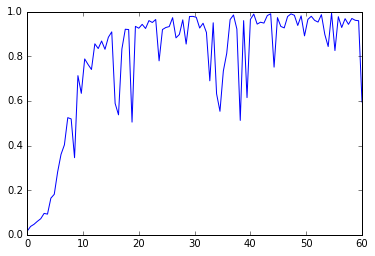

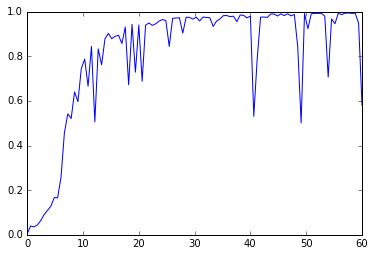

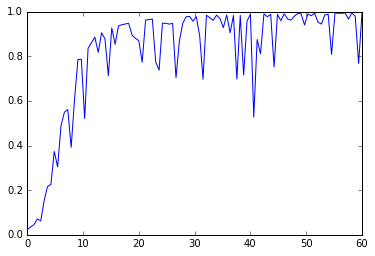

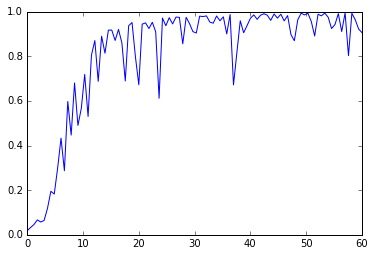

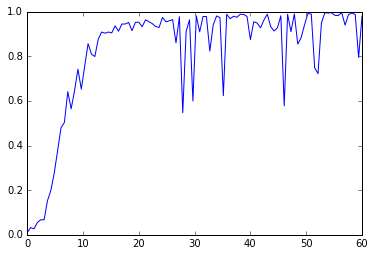

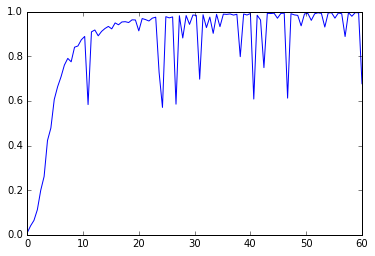

In [27]:
j_overlaps = OrderedDict()
for k in tnrange(10):
    n = 5
    terms = []
    for i in range(1, n+1):
        for j in range(i + 1, n+1):
            a = random.uniform(-1, 1)
            terms.append(XXZZham.XXZZ_term(i, j, a))

    H = XXZZham.XXZZham(terms)
    
    com_ham = H.get_commuting_term_ham()
    h_com_rot = rotate_to_00_base(com_ham)
    
    psi0 = H.get_ham().eigenstates(eigvals = 0 )[1][0]
    psi0_extended = Qobj(
        np.concatenate(
            (psi0.data.toarray(),
             np.zeros((N**2-N,1))),0),
            dims=(tensor([basis(2,0)] * 2*n).dims)
    )

    for j in tnrange(0,300,3 ,desc='Loop no %s ' % k):
        j = j / 5  
        _,eigvecs = add_high_energies(h_com_rot, j).eigenstates(eigvals=2)
        psij = eigvecs[0]
        psij2 = eigvecs[1]
        j_overlaps[j] = max(abs(psij.overlap(psi0_extended))**2,
                            abs(psij2.overlap(psi0_extended))**2)
    plt.figure()
    plt.plot(np.linspace(0,300/5,100), list(j_overlaps.values()))


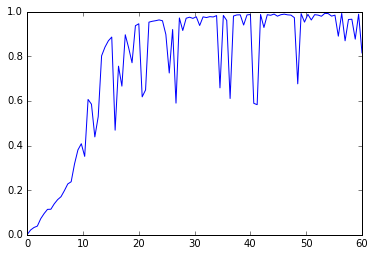

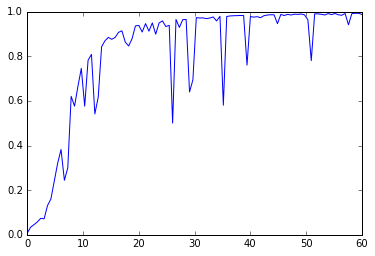

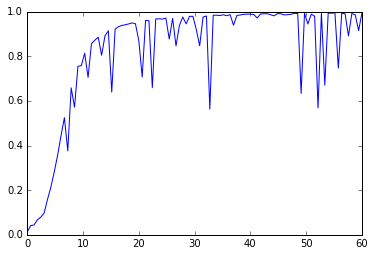

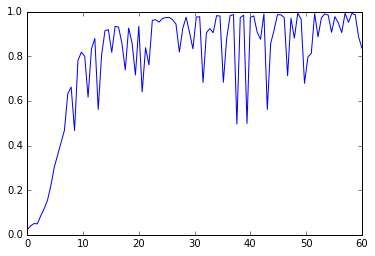

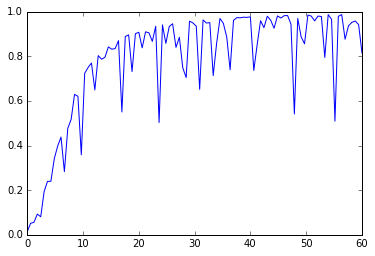

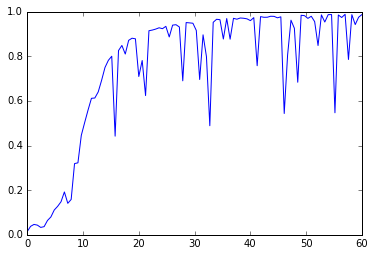

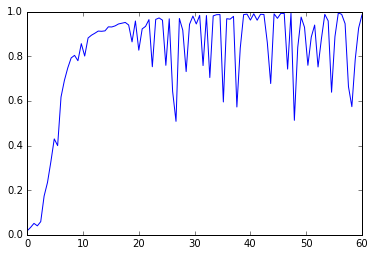

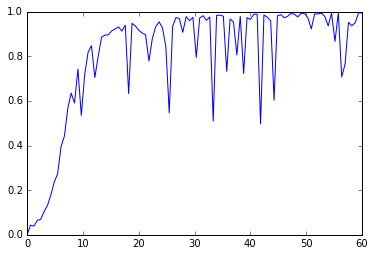

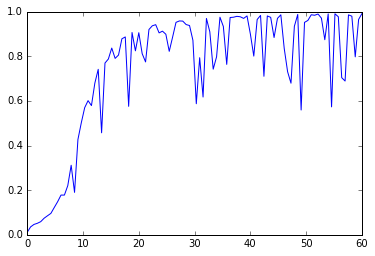

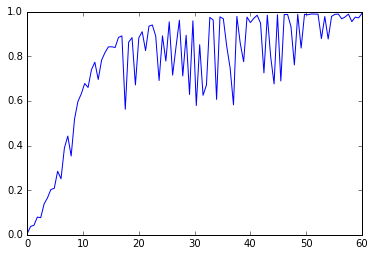

In [12]:
import random
from collections import OrderedDict
from tqdm import tnrange
j_overlaps = OrderedDict()
for k in tnrange(10):
    n = 5
    terms = []
    for i in range(1, n+1):
        for j in range(i + 1, n+1):
            a = random.uniform(-1, 1)
            terms.append(XXZZham.XXZZ_term(i, j, a))

    H = XXZZham.XXZZham(terms)
    
    com_ham = H.get_commuting_term_ham()
    h_com_rot = rotate_to_00_base(com_ham)
    
    psi0 = H.get_ham().eigenstates(eigvals = 0 )[1][0]
    psi0_extended = Qobj(
        np.concatenate(
            (psi0.data.toarray(),
             np.zeros((N**2-N,1))),0),
            dims=(tensor([basis(2,0)] * 2*n).dims)
    )

    for j in tnrange(0,300,3 ,desc='Loop no %s ' % k):
        j = j / 5  
        _,eigvecs = add_high_energies(h_com_rot, j).eigenstates(eigvals=2)
        psij = eigvecs[0]
        psij2 = eigvecs[1]
        j_overlaps[j] = max(abs(psij.overlap(psi0_extended))**2,
                            abs(psij2.overlap(psi0_extended))**2)
    plt.figure()
    plt.plot(np.linspace(0,300/5,100), list(j_overlaps.values()))
